In [56]:
# manipulacja danymi
import numpy as np
import pandas as pd

# wizualizacja danych
import matplotlib.pyplot as plt
import seaborn as sns

# statystyczna analiza danych
from scipy import stats

# przygotowanie danych
from sklearn.preprocessing import StandardScaler, MinMaxScaler
dataset = pd.read_csv('titanic.csv')
dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [57]:
fare_values = dataset.loc[dataset['Fare'].notnull(), 'Fare'].values
print(fare_values)

[  7.25    71.2833   7.925   53.1      8.05     8.4583  51.8625  21.075
  11.1333  30.0708  16.7     26.55     8.05    31.275    7.8542  16.
  29.125   13.      18.       7.225   26.      13.       8.0292  35.5
  21.075   31.3875   7.225  263.       7.8792   7.8958  27.7208 146.5208
   7.75    10.5     82.1708  52.       7.2292   8.05    18.      11.2417
   9.475   21.       7.8958  41.5792   7.8792   8.05    15.5      7.75
  21.6792  17.8     39.6875   7.8     76.7292  26.      61.9792  35.5
  10.5      7.2292  27.75    46.9      7.2292  80.      83.475   27.9
  27.7208  15.2458  10.5      8.1583   7.925    8.6625  10.5     46.9
  73.5     14.4542  56.4958   7.65     7.8958   8.05    29.      12.475
   9.       9.5      7.7875  47.1     10.5     15.85    34.375    8.05
 263.       8.05     8.05     7.8542  61.175   20.575    7.25     8.05
  34.6542  63.3583  23.      26.       7.8958   7.8958  77.2875   8.6542
   7.925    7.8958   7.65     7.775    7.8958  24.15    52.      14.4542
  

In [58]:
mean_fare = np.round(np.mean(fare_values))
print(mean_fare)

32.0


In [59]:
median_fare = np.round(np.median(fare_values))
print(median_fare)

14.0


In [60]:
mode_fare = stats.mode(fare_values)
print(mode_fare)

ModeResult(mode=array([8.05]), count=array([43]))


In [61]:
q0 = np.quantile(fare_values, 0.0)
q1 = np.round(np.quantile(fare_values, 0.25))
q3 = np.round(np.quantile(fare_values, 0.75))
q4 = np.round(np.quantile(fare_values, 1.0))
print(f'Q0: {q0}')
print(f'Q1: {q1}')
print(f'Q2: {median_age}')
print(f'Q3: {q3}')
print(f'Q4: {q4}')

Q0: 0.0
Q1: 8.0
Q2: 28.0
Q3: 31.0
Q4: 512.0


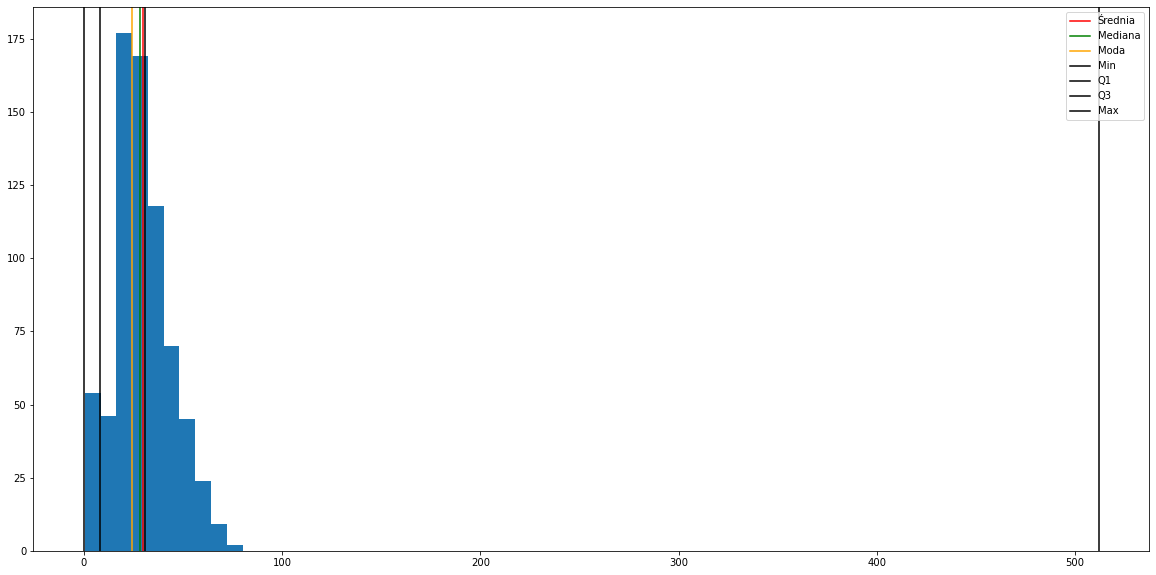

In [62]:
plt.figure(figsize=(20,10))
plt.hist(age_values)
plt.axvline(x = mean_age, color='red', label = 'Średnia')
plt.axvline(x = median_age, color='green', label = 'Mediana')
plt.axvline(x = mode_age[0], color='orange', label = 'Moda')
plt.axvline(x = q0, color='black', label = 'Min')
plt.axvline(x = q1, color='black', label = 'Q1')
plt.axvline(x = q3, color='black', label = 'Q3')
plt.axvline(x = q4, color='black', label = 'Max')
plt.legend(loc='upper right')
plt.show()

In [63]:
range_fare = max(fare_values) - min(fare_values)
print(range_fare)

512.3292


In [64]:
iqr = q3 - q1
print(iqr)

23.0


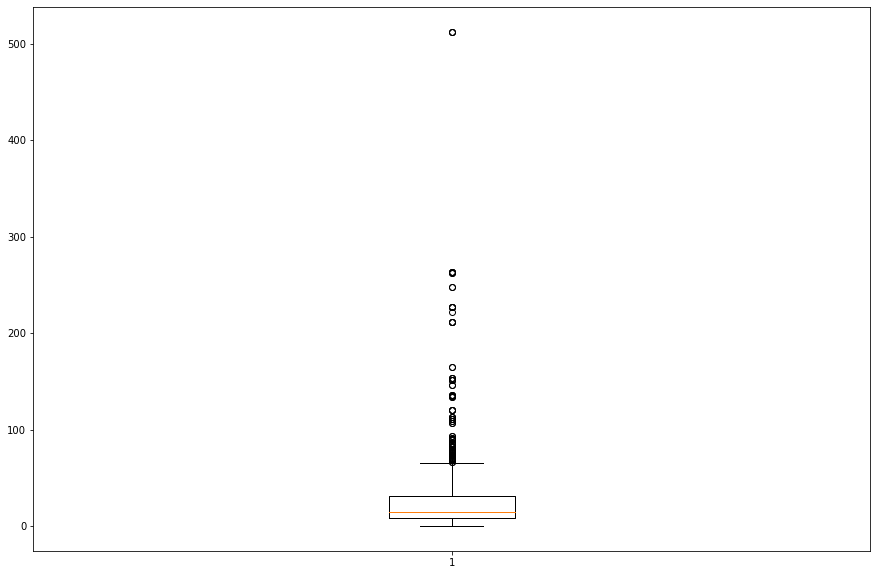

In [65]:
plt.figure(figsize=(15,10))
plt.boxplot(fare_values)
plt.show()

In [66]:
variance_fare = np.var(fare_values, ddof=1)
print(variance_fare)

2469.436845743116


In [67]:
print(variance_fare**(1/2))

49.6934285971809


In [68]:
standard_deviation_fare = np.std(fare_values, ddof=1)
print(standard_deviation_fare)

49.6934285971809


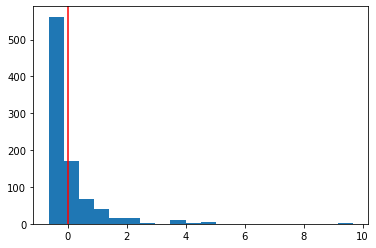

Średnia: 3.987332972840069e-18
Odchylenie standardowe: 1.0005616400330457


In [69]:
scaler_standardized = StandardScaler()
standardized_fare_values = scaler_standardized.fit_transform(fare_values.reshape(-1, 1))
plt.hist(standardized_fare_values, bins=20)
plt.axvline(x = standardized_fare_values.mean(), color='red', label = 'Średnia')
plt.show()
print(f'Średnia: {standardized_fare_values.mean()}')
print(f'Odchylenie standardowe: {np.std(standardized_fare_values, ddof=1)}')

In [70]:
class_values = dataset.loc[dataset['Pclass'].notnull(), 'Pclass'].values

stats.pearsonr(fare_values, class_values)

(-0.5494996199439077, 1.9673861734207248e-71)